In [304]:
import numpy as np
import pandas as pd
import datetime
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn import cross_validation as cv
%matplotlib inline
import matplotlib.dates as mdates
from matplotlib import style
style.use('ggplot')
import os, sys


In [305]:
df_co_summary = pd.read_csv('CO_Summary_aqi_date.csv', engine='python')
df_co_summary.head()

,date_local,avg_aqi_CO
0,1/1/1990,27.0
1,1/2/1990,23.0
2,1/3/1990,39.5
3,1/4/1990,40.5
4,1/5/1990,41.0


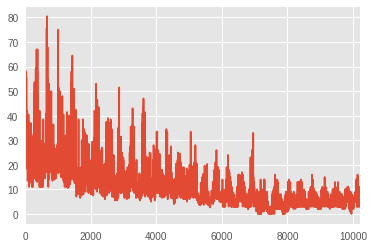

In [306]:
df_co_summary['date'] = pd.to_datetime(df_co_summary['date_local'])
df_co_summary.head()

from matplotlib import style
style.use('ggplot')

df_co_summary['avg_aqi_CO'].plot()

In [248]:
df_co_summary = df_co_summary[["avg_aqi_CO","date"]]

In [249]:
df_co_summary.head()

,avg_aqi_CO,date
0,27.0,1990-01-01
1,23.0,1990-01-02
2,39.5,1990-01-03
3,40.5,1990-01-04
4,41.0,1990-01-05


In [250]:
df_SF_crime = pd.read_csv('crime_per_day.csv', engine = 'python')

In [251]:
df_SF_crime.head()

,crimes,date
0,557,2003-01-01
1,366,2003-01-02
2,406,2003-01-03
3,322,2003-01-04
4,354,2003-01-05


In [252]:
df_SF_crime["date"] = pd.to_datetime(df_SF_crime['date'])

In [253]:
df_SF_crime.head()


,crimes,date
0,557,2003-01-01
1,366,2003-01-02
2,406,2003-01-03
3,322,2003-01-04
4,354,2003-01-05


In [254]:
(df_SF_crime.head())

,crimes,date
0,557,2003-01-01
1,366,2003-01-02
2,406,2003-01-03
3,322,2003-01-04
4,354,2003-01-05


In [255]:
df_pop = pd.read_csv('Pop_per_year.csv', engine = 'python')

In [256]:
df_pop.head(2)

,sr no,year,pop
0,0,2003,757638
1,1,2004,750133


In [257]:
crime_per_capita = []
for i, date in enumerate(df_SF_crime['date']):
    for j, year in enumerate(df_pop['year']):
        if str(year) in str(date):
            pop = df_pop.loc[j, 'pop']
            crimes = df_SF_crime.loc[i, 'crimes']
            crime_per_capita.append(crimes*100000/float(pop))
            
df_SF_crime['crime_per_capita'] = crime_per_capita

In [258]:
df_SF_crime. head()

,crimes,date,crime_per_capita
0,557,2003-01-01,73.517960
1,366,2003-01-02,48.308031
2,406,2003-01-03,53.587597
3,322,2003-01-04,42.500508
4,354,2003-01-05,46.724161


In [259]:
len(df_SF_crime)

5613

In [260]:
df_NO2 = pd.read_csv('NO2_Summary_aqi_date.csv', engine ='python')

In [261]:
df_NO2.head()
df_NO2['date'] = pd.to_datetime(df_NO2['date_local'])

In [262]:
df_NO2.head()

,date_local,avg_aqi_NO2,date
0,1/25/1990,57.0,1990-01-25
1,1/26/1990,38.0,1990-01-26
2,1/27/1990,47.0,1990-01-27
3,1/28/1990,47.0,1990-01-28
4,1/29/1990,38.0,1990-01-29


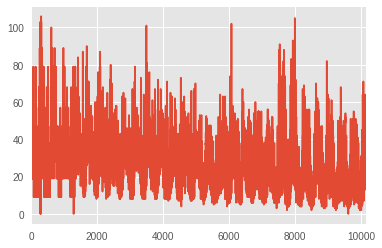

In [307]:
df_NO2 = df_NO2[["avg_aqi_NO2","date"]]



df_NO2['avg_aqi_NO2'].plot()

In [309]:
df_NO2.head()

,avg_aqi_NO2,date
0,57.0,1990-01-25
1,38.0,1990-01-26
2,47.0,1990-01-27
3,47.0,1990-01-28
4,38.0,1990-01-29


In [310]:
df_pm25 = pd.read_csv('pm25_Summary_aqi_date.csv', engine = 'python')

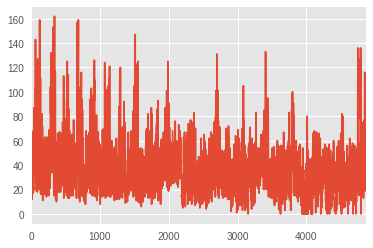

In [311]:
#df_pm25.head()
df_pm25['date'] = pd.to_datetime(df_pm25['date_local'])
df_pm25.head()


df_pm25['avg_aqi_pm25'].plot()

In [312]:
df_pm25 = df_pm25[["avg_aqi_pm25","date"]]

In [313]:
df_pm25.head()

,avg_aqi_pm25,date
0,46.0,1999-02-05
1,70.0,1999-02-12
2,41.0,1999-02-17
3,54.0,1999-02-23
4,39.0,1999-02-26


In [314]:
df_co_summary.head()

,date_local,avg_aqi_CO,date
0,1/1/1990,27.0,1990-01-01
1,1/2/1990,23.0,1990-01-02
2,1/3/1990,39.5,1990-01-03
3,1/4/1990,40.5,1990-01-04
4,1/5/1990,41.0,1990-01-05


In [315]:
df_SF_crime.head()

,crimes,date,crime_per_capita
0,557,2003-01-01,73.517960
1,366,2003-01-02,48.308031
2,406,2003-01-03,53.587597
3,322,2003-01-04,42.500508
4,354,2003-01-05,46.724161


In [316]:
df_merge = df_SF_crime.merge(df_co_summary,on="date",how="inner")

In [317]:
df_merge.head()

,crimes,date,crime_per_capita,date_local,avg_aqi_CO
0,557,2003-01-01,73.517960,1/1/2003,21.0
1,366,2003-01-02,48.308031,1/2/2003,12.5
2,406,2003-01-03,53.587597,1/3/2003,16.5
3,322,2003-01-04,42.500508,1/4/2003,17.0
4,354,2003-01-05,46.724161,1/5/2003,17.5


In [318]:
#df_merge = df_merge[["crimes","avg_aqi_CO","crime_per_capita"]]

In [319]:
#df_merge

In [320]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_merge[['avg_aqi_CO']], df_merge['crime_per_capita'], test_size=0.33, random_state=42)

In [321]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [322]:
y_predict=regr.predict(X_test)
from sklearn.metrics import mean_squared_error
rmse  = mean_squared_error(y_test, y_predict)
print(rmse)

33.8333805589


In [323]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [324]:
y_predict=regr.predict(X_test)
from sklearn.metrics import mean_squared_error
rmse  = mean_squared_error(y_test, y_predict)
print(rmse)

34.211615857


In [325]:
from sklearn.ensemble import GradientBoostingRegressor

regr = GradientBoostingRegressor(n_estimators=100)
regr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [326]:
y_predict=regr.predict(X_test)
from sklearn.metrics import mean_squared_error
rmse  = mean_squared_error(y_test, y_predict)
print(rmse)

32.7103099891


In [327]:
df_merge_2 = df_SF_crime.merge(df_NO2,on="date",how="inner")

In [328]:
df_merge_2.head()

,crimes,date,crime_per_capita,avg_aqi_NO2
0,557,2003-01-01,73.517960,35.0
1,366,2003-01-02,48.308031,32.0
2,406,2003-01-03,53.587597,37.0
3,322,2003-01-04,42.500508,38.0
4,354,2003-01-05,46.724161,33.0


In [329]:
df_merge_2 = df_merge_2[["crimes","avg_aqi_NO2","crime_per_capita"]]
df_merge_2.head()

,crimes,avg_aqi_NO2,crime_per_capita
0,557,35.0,73.517960
1,366,32.0,48.308031
2,406,37.0,53.587597
3,322,38.0,42.500508
4,354,33.0,46.724161


In [330]:
X_train, X_test, y_train, y_test = train_test_split(df_merge_2[['avg_aqi_NO2']], df_merge_2['crime_per_capita'], test_size=0.33, random_state=42)

In [331]:
regr2 = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=47)
regr2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=47, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [332]:
y_predict=regr2.predict(X_test)
from sklearn.metrics import mean_squared_error
rmse  = mean_squared_error(y_test, y_predict)
print(rmse)

33.2621110534


In [333]:
regr2 = LinearRegression()
regr2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [334]:
y_predict=regr2.predict(X_test)
from sklearn.metrics import mean_squared_error
rmse  = mean_squared_error(y_test, y_predict)
print(rmse)

33.496728369


In [335]:
df_merge_3 = df_SF_crime.merge(df_pm25,on="date",how="inner")
#len(df_merge_3)
df_merge_3 = df_merge_3[np.isfinite(df_merge_3['avg_aqi_pm25'])]
df_merge_3.head()
len(df_merge_3)

4104

In [336]:
X_train, X_test, y_train, y_test = train_test_split(df_merge_3[['avg_aqi_pm25']], df_merge_3['crime_per_capita'], test_size=0.33, random_state=42)

In [337]:
regr3 = LinearRegression()
regr3.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [338]:
y_predict=regr3.predict(X_test)
from sklearn.metrics import mean_squared_error
rmse  = mean_squared_error(y_test, y_predict)
print(rmse)

34.6289205888


In [339]:
regr3 = GradientBoostingRegressor(n_estimators=100)
regr3.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [340]:
y_predict=regr3.predict(X_test)
from sklearn.metrics import mean_squared_error
rmse  = mean_squared_error(y_test, y_predict)
print(rmse)

35.4894781134


In [341]:
#tss_score = cv.Cross_Validation(df_merge3[['avg_aqi_pm25']], df_merge3['per_capita'], regr, 10)
#print('10-fold cross validation using time series split (additive): {} '.format(tss_score))

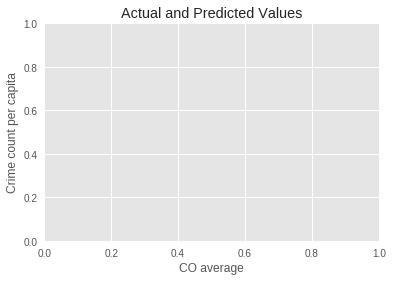

In [344]:
#plt.plot(X_test['avg_aqi_NO2'], y_test, 'bo', label = 'actual')
#plt.plot(X_test['avg_aqi_NO2'], y_predict, 'ro', label = 'prediction')
plt.xticks(rotation = '0'); 
plt.legend()
plt.xlabel('CO average'); plt.ylabel('Crime count per capita'); plt.title('Actual and Predicted Values');

In [345]:
df_merge.corr()

,crimes,crime_per_capita,avg_aqi_CO
crimes,1.000000,0.891122,0.126757
crime_per_capita,0.891122,1.000000,0.244753
avg_aqi_CO,0.126757,0.244753,1.000000


In [346]:
df_merge_2.corr()

,crimes,avg_aqi_NO2,crime_per_capita
crimes,1.000000,0.044855,0.890804
avg_aqi_NO2,0.044855,1.000000,0.101275
crime_per_capita,0.890804,0.101275,1.000000


In [347]:
df_merge_3.corr()

,crimes,crime_per_capita,avg_aqi_pm25
crimes,1.000000,0.892985,-0.011632
crime_per_capita,0.892985,1.000000,0.060367
avg_aqi_pm25,-0.011632,0.060367,1.000000
